# Water Quality Prediction
---

## Table of Contents
- [Introduction](#id-section1)
- [Python Code](#id-section2)
  * [Load packages](#id-section21)
  * [Load data](#id-section22)
  * [Visualizing Potability (target)](#id-section23)
  * [Data statistics](#id-section24)
  * [Imputation (handling the missing data points)](#id-section25)
  * [Define Model 1: Random Forest Classifier](#id-section26)
  * [Analyze the Results: Random Forest Classifier](#id-section27)
  * [Improving the model by looking at the correlation diagrams](#id-section28)
  * [Modification](#id-section29)
    + [Changing features, keeping the same model](#id-section291)
    + [Playing around with the Random Forest Classifier parameters](#id-section292)
  * [Define Model 2: Multi-layer Perceptron Classifier](#id-section210)
  * [Define Model 3: Deep Neural Network](#id-section211)
  * [Data Imputation: another approach](#id-section212)
  * [Summary](#id-section213)


<div id='id-section1'/>

## Introduction

Water quality refers to the chemical, physical, and biological characteristics of water based on the standards of its usage. The most common standards used to monitor and assess water quality convey the health of ecosystems, safety of human contact, and condition of drinking water. Water quality has a significant impact on water supply and oftentimes determines supply options.

The parameters for water quality are determined by the intended use. Work in the area of water quality tends to be focused on water that is treated for potability, industrial/domestic use, or restoration. Contaminants that may be in untreated water include microorganisms such as viruses, protozoa and bacteria; inorganic contaminants such as salts and metals; organic chemical contaminants from industrial processes and petroleum use; pesticides and herbicides; and radioactive contaminants. 

The United States Environmental Protection Agency (EPA) limits the amounts of certain contaminants in tap water provided by US public water systems. The Safe Drinking Water Act authorizes EPA to issue two types of standards:

* Primary standards regulate substances that potentially affect human health.
* Secondary standards prescribe aesthetic qualities, those that affect taste, odor, or appearance.


In this notebook, we try to assess water potability (fit to drink) based on 9 features:
1. **pH**: In chemistry, pH is a scale used to specify the acidity or basicity of an aqueous solution. Acidic solutions (solutions with higher concentrations of H<sup>+</sup> ions) are measured to have lower pH values than basic or alkaline solutions. The pH scale is logarithmic and inversely indicates the concentration of hydrogen ions in the solution. At 25 °C, solutions with a pH less than 7 are acidic, and solutions with a pH greater than 7 are basic. Solutions with a pH of 7 at this temperature are neutral. 
> The pH of most drinking-water lies within the range 6.5 – 8.5.


2. **Hardness**: Water hardness is generally the amount of dissolved calcium and magnesium in water. But in layman's terms, you may notice water hardness when your hands still feel slimy after washing with soap and water, or when your drinking glasses at home become less than crystal clear. Hard water is high in dissolved minerals, largely calcium and magnesium. 
> Generally, water with the hardness of < 75 mg/L is considered soft and > 150 mg/L is considered hard.


3. **Total Dissolved Solids (TDS)**: Is a measure of the combined total of organic and inorganic substances contained in a liquid. This includes anything present in water other than the pure H<sub>2</sub>O molecules. These solids are primarily minerals, salts and organic matter that can be a general indicator of water quality.
> The TDS of fresh water is < 1000 mg/L. Drinking water generally has a TDS below 500 ppm. Higher TDS Fresh Water is drinkable but taste may be objectionable.

4. **Chloramines**: Chloramines (also known as secondary disinfection) are disinfectants used to treat drinking water and they are most commonly formed when ammonia is added to chlorine to treat drinking water. They provide longer-lasting disinfection as the water moves through pipes to consumers.
> According to CDC, Chloramine levels up to 4 mg/L are considered safe in drinking water.

5. **Sulfate**: Sulfate is a chemical commonly found in air, soil and water. Since it is soluble (easily dissolved) in water, sulfate is found at high concentrations in many aquifers. Sulfate is considered a secondary contaminant and nuisance chemical in high enough concentrations. High sulfate levels may also corrode plumbing, particularly copper piping. 
> A water quality survey carried out on British tap water supplies indicated a mean sulfate concentration of 59.5 mg/L, with a maximum of 236 mg/L. Sulfate levels above 250 mg/L may make the water taste bitter or like medicine. 

6. **Conductivity**: Electrical Conductivity of water is its ability to conduct an electric current. Salts or other chemicals that dissolve in water can break down into positively and negatively charged ions. In many cases, conductivity is linked directly to the total dissolved solids (TDS).
> Typical drinking water is in the range of 200 – 800 μS/cm but in general it is better to not exceed 400 μS/cm.

7. **Total Organic Carbon (TOC)**: TOC is a measure of the total amount of carbon in organic compounds in pure water. The produced TOC number indicates Organic materials (natural), Disinfectants and Disinfection byproducts.
> Typical TOC values in drinking water should not exceed 2 ppm.

8. **Trihalomethanes (THMs)**: Trihalomethanes are a group of chemicals that can form when organic matter in water is treated with halogen disinfectants such as chlorine. The most common of these chemicals is trichloromethane (also called chloroform), but others, such as dibromochloromethane, bromodichloromethane, or bromoform can also be found. The sum of these four chemicals is referred to as total trihalomethanes (TTHMs).
> The Florida Department of Environmental Protection's drinking water standard for TTHMs is 80 micrograms per liter (80 µg/L).

9. **Turbidity**: Turbidity is the measure of relative clarity of a liquid. It is an optical characteristic of water and is a measurement of the amount of light that is scattered by material in the water when a light is shined through the water sample. The higher the intensity of scattered light, the higher the turbidity. Turbidity is measured in a unit called Nephelometric Turbidity Units (NTUs).
> For systems that use conventional or direct filtration, at no time can turbidity (cloudiness of water) go higher than 1 NTUs and for others at no time should exceed 5 NTUs.

Now based on these 9 features we will find whether the water is safe to drink or no (water **Potability** = 0 or 1).

**Note**: The dataset of this notebook was obtained from https://www.kaggle.com/adityakadiwal/water-potability.

<div id='id-section2'/>

## Python Code

<div id='id-section21'/>

### 1. Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from tensorflow import keras
from tensorflow.keras import layers, callbacks

from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, accuracy_score

<div id='id-section22'/>

### 2. Load data

In [2]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
# num of NaNs in dataset in each column
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df['Potability'].unique()

array([0, 1])

<div id='id-section23'/>

### 3. Visualizing Potability (target)

0    1998
1    1278
Name: Potability, dtype: int64


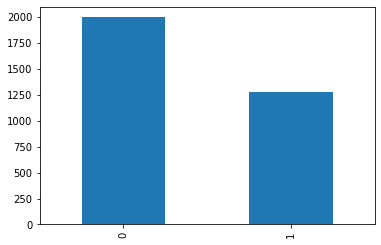

In [6]:
print(df.Potability.value_counts())
df.Potability.value_counts().plot(kind='bar')
plt.show()

<div id='id-section24'/>

### 4. Data Statistics

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


We can see that 3 columns have missing data: **'ph'**, **'Sulfate'**, and **'Trihalomethanes'**. We need to take care of this first before we move on. The easiest way is to substitute the 'NaN' with the mean value in each column which we will do here.

<div id='id-section25'/>

### 5. Imputation (handling the missing data points)

In [8]:
numerical_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 
                  'Trihalomethanes', 'Turbidity']
categorical_cols = ['Potability']

print('numerical_cols:',numerical_cols)
print('numerical_cols:',categorical_cols)

numerical_cols: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
numerical_cols: ['Potability']


In [9]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean') # the default is mean
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols)])

Here we assume all the columns are significant in predicting the water potability. 

In [10]:
feature_columns_1 = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                     'Organic_carbon', 'Trihalomethanes', 'Turbidity']
X = df[feature_columns_1]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

<div id='id-section26'/>

### 6. Define Model 1: Random Forest Classifier

In [11]:
model_rfc = RandomForestClassifier(random_state=1)

In [12]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rfc)])
my_pipeline.fit(X_train, y_train)
preds_test = my_pipeline.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds_test))

MAE: 0.3540903540903541


In [13]:
# cross validate
# Multiply by -1 since sklearn calculates *negative* MAE

# cv = Determines the cross-validation splitting strategy, the default 5-fold cross validation
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print(scores)
print(scores.mean())

[0.39634146 0.35419847 0.35114504 0.39541985 0.33129771]
0.3656805064233848


<div id='id-section27'/>

### 7. Analyze the Results: Random Forest Classifier

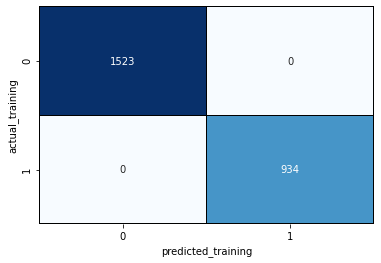

In [37]:
# Train dataset
preds_train = my_pipeline.predict(X_train)
conf_train = confusion_matrix(y_train, preds_train)
ax = plt.axes()
sns.heatmap(conf_train, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_training', ylabel = 'actual_training')
plt.show()

In [33]:
print(classification_report(y_train, preds_train))
print('accuracy =',accuracy_score(y_train, preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1523
           1       1.00      1.00      1.00       934

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457

accuracy = 1.0


It seems that there is an overfitting to the train data.

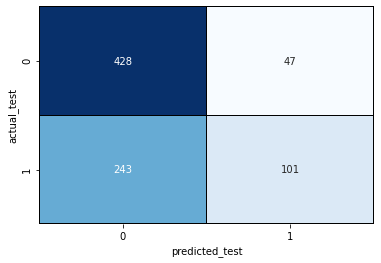

[[428  47]
 [243 101]]


In [36]:
# Test dataset
conf_test = confusion_matrix(y_test, preds_test)
ax = plt.axes()
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_test', ylabel = 'actual_test')
plt.show()
print(conf_test)

In [34]:
print(classification_report(y_test, preds_test))
print('accuracy =',accuracy_score(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75       475
           1       0.68      0.29      0.41       344

    accuracy                           0.65       819
   macro avg       0.66      0.60      0.58       819
weighted avg       0.66      0.65      0.61       819

accuracy = 0.645909645909646


<div id='id-section28'/>

### 8. Improving the model by looking at the correlation diagrams

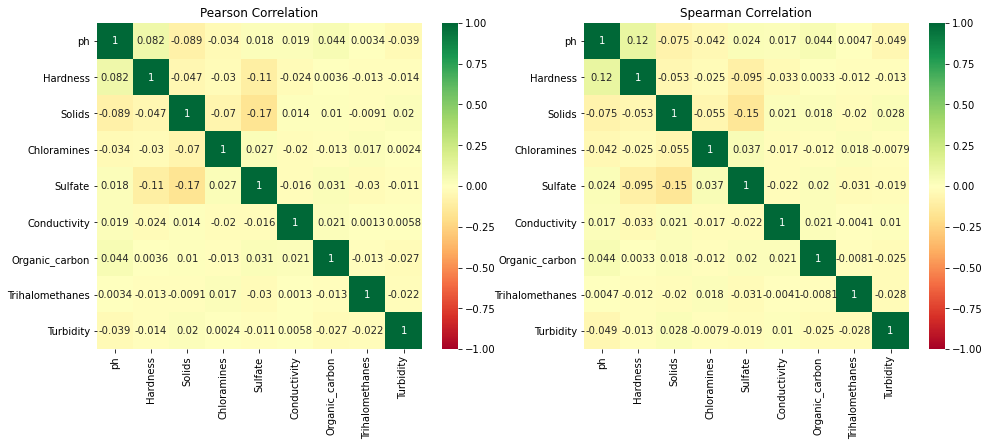

In [38]:
corr_pearson = df[feature_columns_1].corr(method='pearson')
corr_spearman = df[feature_columns_1].corr(method='spearman')

plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

Surprisingly, it is clear that there is little to no correlation between the features. Now let's plot our target against each feature separately.

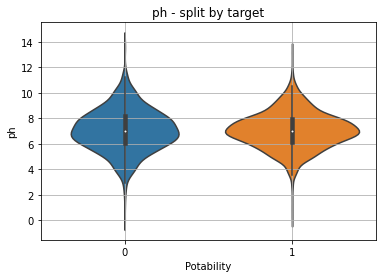

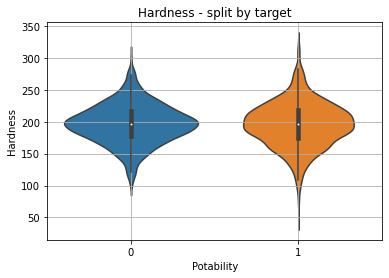

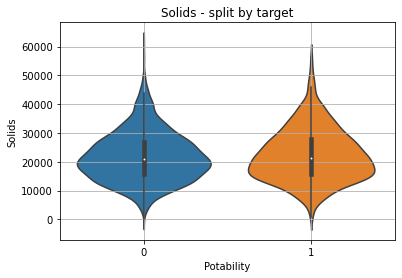

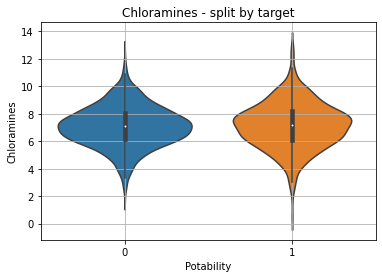

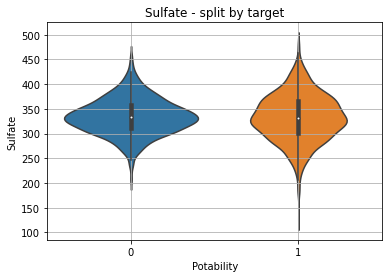

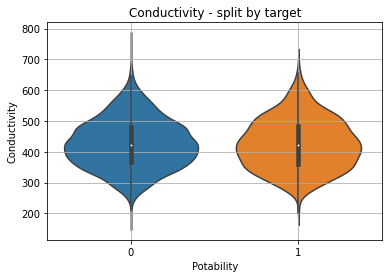

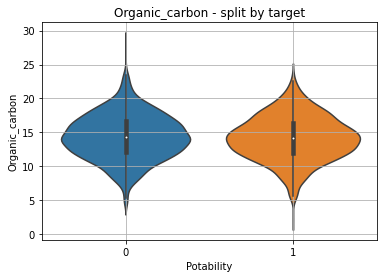

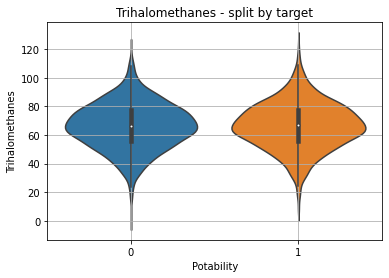

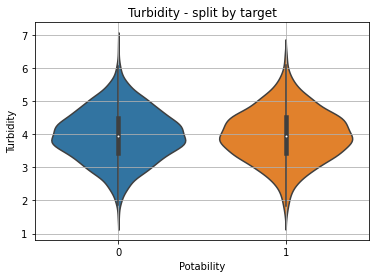

In [39]:
# Target vs Features
for f in feature_columns_1:
    plt.figure(figsize=(6,4))
    sns.violinplot(y=f, x='Potability', data=df)
    my_title = f + ' - split by target'
    plt.title(my_title)
    plt.grid()

It seems that the diagram of Potability is significantly not affected by some of the features suggesting that some of these features might not be important in predicting Potability of water.

<div id='id-section29'/>

### 9. Modification

<div id='id-section291'/>

### 9.1. Changing features, keeping the same model

In [40]:
feature_columns_2 = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate']
X = df[feature_columns_2]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean') # the default is mean
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, feature_columns_2)])

model_rfc = RandomForestClassifier(random_state=1)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rfc)])
my_pipeline.fit(X_train, y_train)
preds_test = my_pipeline.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds_test))

# cross validate
# Multiply by -1 since sklearn calculates *negative* MAE

# cv = Determines the cross-validation splitting strategy, the default 5-fold cross validation
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print(scores)
print(scores.mean())

MAE: 0.3308913308913309
[0.41768293 0.3480916  0.36183206 0.41526718 0.35114504]
0.3788037609383727


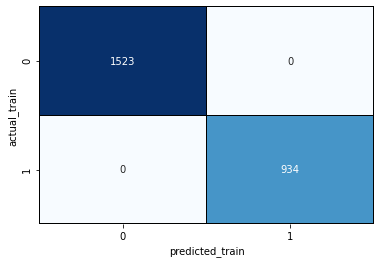

In [46]:
# Train
preds_train = my_pipeline.predict(X_train)
conf_train = confusion_matrix(y_train, preds_train)
ax = plt.axes()
sns.heatmap(conf_train, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_train', ylabel = 'actual_train')
plt.show()

In [42]:
print(classification_report(y_train, preds_train))
print('accuracy =',accuracy_score(y_train, preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1523
           1       1.00      1.00      1.00       934

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457

accuracy = 1.0


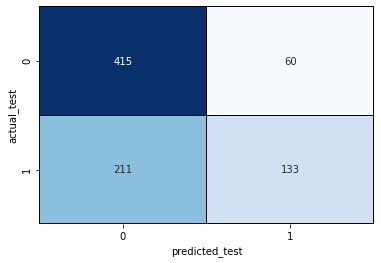

In [45]:
# Test
conf_test = confusion_matrix(y_test, preds_test)
ax = plt.axes()
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_test', ylabel = 'actual_test')
plt.show()

In [44]:
print(classification_report(y_test, preds_test))
print('accuracy =',accuracy_score(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       475
           1       0.69      0.39      0.50       344

    accuracy                           0.67       819
   macro avg       0.68      0.63      0.62       819
weighted avg       0.67      0.67      0.65       819

accuracy = 0.6691086691086691


As can be seen, there is a small improvement in predicting 'Potability=1' by just removing some of the irrelavant columns: the overall accuracy has improved from **0.65** to **0.67**.

<div id='id-section292'/>

### 9.2. Playing around with the Random Forest Classifier parameters
#### 9.2.1. max_leaf_nodes

In [57]:
# 1. max_leaf_nodes
mae_accuracy = []
for i in range(2,101):
    model_rfc = RandomForestClassifier(max_leaf_nodes=i, random_state=1)
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model_rfc)])
    my_pipeline.fit(X_train, y_train)
    preds_train = my_pipeline.predict(X_train)
    #print('MAE Train:', mean_absolute_error(y_train, preds_train))
    preds_test = my_pipeline.predict(X_test)
    #print('MAE Test:', mean_absolute_error(y_test, preds_test))
    
    # we add num of leaf, mae_test, mae_train, and accuracy to our list
    mae_accuracy.append([i,mean_absolute_error(y_test, preds_test),mean_absolute_error(y_train, preds_train),
                         accuracy_score(y_test, preds_test)])

# sort by MAE Test
mae_accuracy.sort(key = lambda x: x[1])
# Top 3 MAE
print('Top 3 models sorted by least MAE:',mae_accuracy[0:3])
max_leaf_mae = mae_accuracy[0][0]
print('optimal max leaf :',max_leaf_mae)
print('\n')
# sort by Accuracy Test
mae_accuracy.sort(key = lambda x: x[3], reverse=True)
# Top 3 MAE
print('Top 3 models sorted by best accuracy:',mae_accuracy[0:3])
max_leaf_accuracy = mae_accuracy[0][0]
print('optimal max leaf :',max_leaf_accuracy)


Top 3 models sorted by least MAE: [[89, 0.3528693528693529, 0.18274318274318274, 0.6471306471306472], [88, 0.3540903540903541, 0.18315018315018314, 0.645909645909646], [90, 0.3540903540903541, 0.1807081807081807, 0.645909645909646]]
optimal max leaf : 89


Top 3 models sorted by best accuracy: [[89, 0.3528693528693529, 0.18274318274318274, 0.6471306471306472], [88, 0.3540903540903541, 0.18315018315018314, 0.645909645909646], [90, 0.3540903540903541, 0.1807081807081807, 0.645909645909646]]
optimal max leaf : 89


It is clear that both MAE (lowest MAE) and accuracy (highest accuracy) give the same number of max_leaf_nodes. So **max_leaf_nodes = 89** gives us the lowest MAE and highest accuracy.

Now let's set the number of **max_leaf_nodes = 89** and remodel our system.

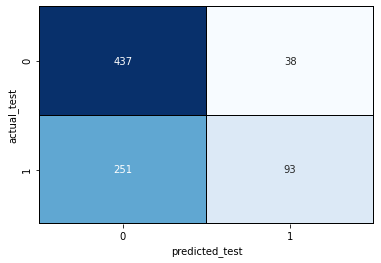

              precision    recall  f1-score   support

           0       0.64      0.92      0.75       475
           1       0.71      0.27      0.39       344

    accuracy                           0.65       819
   macro avg       0.67      0.60      0.57       819
weighted avg       0.67      0.65      0.60       819

accuracy = 0.6471306471306472


In [53]:
model_rfc = RandomForestClassifier(max_leaf_nodes=89, random_state=1)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rfc)])
my_pipeline.fit(X_train, y_train)
preds_test = my_pipeline.predict(X_test)

# Test
conf_test = confusion_matrix(y_test, preds_test)
ax = plt.axes()
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_test', ylabel = 'actual_test')
plt.show()

print(classification_report(y_test, preds_test))
print('accuracy =',accuracy_score(y_test, preds_test))

#### 9.2.2. n_estimators

In [55]:
# 2. n_estimators
mae_accuracy = []
for i in range(1,101):
    model_rfc = RandomForestClassifier(max_leaf_nodes=89, n_estimators=i, random_state=1)
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model_rfc)])
    my_pipeline.fit(X_train, y_train)
    preds_train = my_pipeline.predict(X_train)
    #print('MAE Train:', mean_absolute_error(y_train, preds_train))
    preds_test = my_pipeline.predict(X_test)
    #print('MAE Test:', mean_absolute_error(y_test, preds_test))
    mae_accuracy.append([i,mean_absolute_error(y_test, preds_test),mean_absolute_error(y_train, preds_train),
                         accuracy_score(y_test, preds_test)])

# sort by MAE Test
mae_accuracy.sort(key = lambda x: x[1])
# Top 3 MAE
print('Top 3 models sorted by least MAE:',mae_accuracy[0:3])
n_estimators = mae_accuracy[0][0]
print('optimal n_estimators :',n_estimators)
print('\n')
# sort by Accuracy Test
mae_accuracy.sort(key = lambda x: x[3], reverse=True)
# Top 3 MAE
print('Top 3 models sorted by best accuracy:',mae_accuracy[0:3])
n_estimators = mae_accuracy[0][0]
print('optimal n_estimators :',n_estimators)


Top 3 models sorted by least MAE: [[15, 0.33943833943833945, 0.1908831908831909, 0.6605616605616605], [34, 0.34065934065934067, 0.18233618233618235, 0.6593406593406593], [29, 0.3418803418803419, 0.1794871794871795, 0.6581196581196581]]
optimal n_estimators : 15


Top 3 models sorted by best accuracy: [[15, 0.33943833943833945, 0.1908831908831909, 0.6605616605616605], [34, 0.34065934065934067, 0.18233618233618235, 0.6593406593406593], [29, 0.3418803418803419, 0.1794871794871795, 0.6581196581196581]]
optimal n_estimators : 15


Now let's set the **n_estimators = 15** and remodel our system.

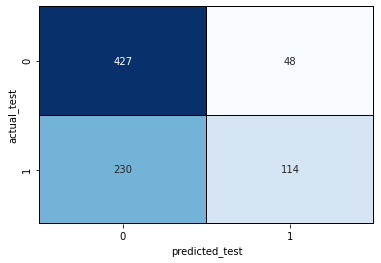

              precision    recall  f1-score   support

           0       0.65      0.90      0.75       475
           1       0.70      0.33      0.45       344

    accuracy                           0.66       819
   macro avg       0.68      0.62      0.60       819
weighted avg       0.67      0.66      0.63       819

accuracy = 0.6605616605616605


In [56]:
model_rfc = RandomForestClassifier(max_leaf_nodes=89, n_estimators=15, random_state=1)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rfc)])
my_pipeline.fit(X_train, y_train)
preds_test = my_pipeline.predict(X_test)

# Test
conf_test = confusion_matrix(y_test, preds_test)
ax = plt.axes()
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_test', ylabel = 'actual_test')
plt.show()

print(classification_report(y_test, preds_test))
print('accuracy =',accuracy_score(y_test, preds_test))

It is clear that **max_leaf_nodes** and **n_estimators** have small influence on the final accuracy. It seems that we need to change our model.

<div id='id-section210'/>

### 10. Define Model 2: Multi-layer Perceptron Classifier
Note: Here, similar to what we did to our previous model, we play around with the parameters and find the optimal ones. We found that **hidden_layer_sizes = 263** gives us the highest accuracy. (we searched up to 500) However, this number is still less than the accuracy which we obtained from the Random Forest Classifier model. Also, early stopping did not really affect the final accuracy.

MAE: 0.3907203907203907


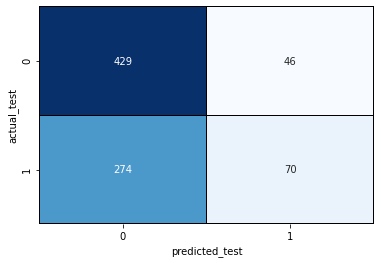

              precision    recall  f1-score   support

           0       0.61      0.90      0.73       475
           1       0.60      0.20      0.30       344

    accuracy                           0.61       819
   macro avg       0.61      0.55      0.52       819
weighted avg       0.61      0.61      0.55       819

accuracy = 0.6092796092796092


In [97]:
# As a reminder
feature_columns_1 = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                     'Organic_carbon', 'Trihalomethanes', 'Turbidity']
X = df[feature_columns_1]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

numerical_transformer = SimpleImputer(strategy='mean') # the default is mean
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, feature_columns_1)])

# Model
#acc = []
#for i in range(1,301):
model_mlp = MLPClassifier(hidden_layer_sizes=263, activation='relu', solver='adam', 
                          batch_size='auto', max_iter=500, 
                          random_state=1, tol=0.0001)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_mlp)])
my_pipeline.fit(X_train, y_train)
preds_test = my_pipeline.predict(X_test)
acc.append([i, accuracy_score(y_test, preds_test)])
print('MAE:', mean_absolute_error(y_test, preds_test))

#acc.sort(key = lambda x: x[1], reverse=True)    
#print('Top 3 :', acc[0:3])
#hid_lay_optimal = acc[0][0]

# Test
conf_test = confusion_matrix(y_test, preds_test)
ax = plt.axes()
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_test', ylabel = 'actual_test')
plt.show()

print(classification_report(y_test, preds_test))
print('accuracy =',accuracy_score(y_test, preds_test))

<div id='id-section211'/>

### 11. Define Model 3: Deep Neural Network

Best Validation Loss: 1.3753
Best Validation Accuracy: 0.5812


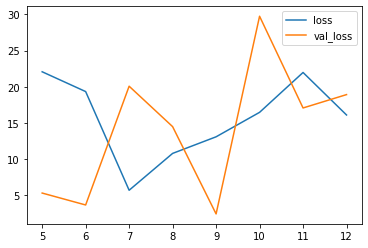

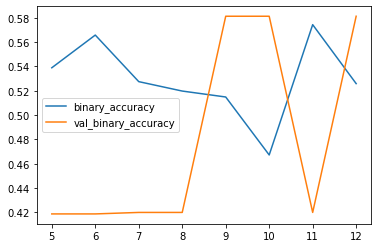

In [125]:
feature_columns_1 = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                     'Organic_carbon', 'Trihalomethanes', 'Turbidity']
X = df[feature_columns_1]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

numerical_transformer = SimpleImputer(strategy='mean') # the default is mean
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, feature_columns_1)])

# preprocessing
#preprocessor = make_column_transformer((StandardScaler(), # numerical data
#                                        make_column_selector(dtype_include=np.number)),
#                                       (OneHotEncoder(sparse=False), # categorical data
#                                        make_column_selector(dtype_include=object)))

model_dnn = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[9]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1, activation='sigmoid')])

model_dnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                               min_delta=0.001,
                                               restore_best_weights=True)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


history = model_dnn.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        batch_size=512,
                        epochs=1000,
                        callbacks=[early_stopping],
                        verbose=0) # hide the output because we have so many epochs

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))



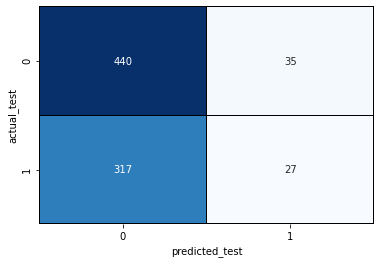

              precision    recall  f1-score   support

           0       0.58      0.93      0.71       475
           1       0.44      0.08      0.13       344

    accuracy                           0.57       819
   macro avg       0.51      0.50      0.42       819
weighted avg       0.52      0.57      0.47       819

accuracy = 0.5702075702075702


In [133]:
preds_test = model_dnn.predict(X_test)

for i in range(len(preds_test)):
    if (preds_test[i] < 0.5):
        preds_test[i] = 0
    else:
        preds_test[i] = 1

# Test
conf_test = confusion_matrix(y_test, preds_test)
ax = plt.axes()
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_test', ylabel = 'actual_test')
plt.show()

print(classification_report(y_test, preds_test))
print('accuracy =',accuracy_score(y_test, preds_test))

<div id='id-section212'/>

### 12. Data Imputation: another approach
It seems that substituting the missing data with the mean value will make the final prediction biased toward more potability. The reason is that the mean value is usually an acceptable value for the water to be safe to drink. However, if for a missing feature value the corresponding potability is 0 (and since we do not have any missing potability values) by replacing the missing feature with the mean value we are actually making the data prediction worse.

So instead of replacing all NaNs with the mean value we first look at the potability. If the potability is 0 then we replace the missing value with the max value (meaning that the water is not desirable to drink) and if the potability is 1 then we replace the NaN with the mean value.

In [4]:
missing_cols = ['ph', 'Sulfate', 'Trihalomethanes']

for i in range(len(df)):
    if (pd.isna(df['ph'][i]) and df['Potability'][i] == 0):
        df['ph'][i] = df.describe()['ph']['max']
    elif (pd.isna(df['ph'][i]) and df['Potability'][i] == 1):
        df['ph'][i] = df.describe()['ph']['mean']

    if (pd.isna(df['Sulfate'][i]) and df['Potability'][i] == 0):
        df['Sulfate'][i] = df.describe()['Sulfate']['max']
    elif (pd.isna(df['Sulfate'][i]) and df['Potability'][i] == 1):
        df['Sulfate'][i] = df.describe()['Sulfate']['mean']

    if (pd.isna(df['Trihalomethanes'][i]) and df['Potability'][i] == 0):
        df['Trihalomethanes'][i] = df.describe()['Trihalomethanes']['max']
    elif (pd.isna(df['Trihalomethanes'][i]) and df['Potability'][i] == 1):
        df['Trihalomethanes'][i] = df.describe()['Trihalomethanes']['mean']

df.isnull().sum()        


<ipython-input-4-296d39367db8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ph'][i] = df.describe()['ph']['max']
<ipython-input-4-296d39367db8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sulfate'][i] = df.describe()['Sulfate']['max']
<ipython-input-4-296d39367db8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trihalomethanes'][i] = df.describe()['Trihalomethanes']['max']
<ipython-input-4-296d39367db8>:7: Sett

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.765504,196.369496,22014.092526,7.122277,356.936395,426.205111,14.284970,68.294745,3.966786,0.390110
std,2.508442,32.879761,8768.570828,1.583085,63.415209,80.824064,3.308162,18.802058,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.341889,196.967627,20927.833607,7.130299,343.302742,421.884968,14.218338,67.304132,3.955028,0.000000
75%,8.439712,216.667456,27332.762127,8.114887,378.230674,481.792304,16.557652,78.230106,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### 12.1. Random Forest Classifier

MAE: 0.24786324786324787


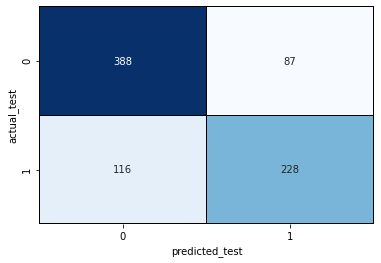

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       475
           1       0.72      0.66      0.69       344

    accuracy                           0.75       819
   macro avg       0.75      0.74      0.74       819
weighted avg       0.75      0.75      0.75       819

accuracy = 0.7521367521367521


In [6]:
feature_columns_1 = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                     'Organic_carbon', 'Trihalomethanes', 'Turbidity']
X = df[feature_columns_1]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model_rfc = RandomForestClassifier(random_state=1)

# Preprocessing for numerical data: here it does not matter as we do not have any NaN
numerical_transformer = SimpleImputer(strategy='mean') # the default is mean
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, feature_columns_1)])

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rfc)])
my_pipeline.fit(X_train, y_train)
preds_test = my_pipeline.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds_test))

# Test
conf_test = confusion_matrix(y_test, preds_test)
ax = plt.axes()
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_test', ylabel = 'actual_test')
plt.show()

print(classification_report(y_test, preds_test))
print('accuracy =',accuracy_score(y_test, preds_test))

Now we can see a significant improvement here! Now let's use another set of features, which was shown previously that might be better descriptors, and see if we can do better!

MAE: 0.21733821733821734


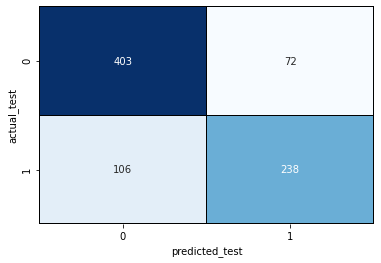

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       475
           1       0.77      0.69      0.73       344

    accuracy                           0.78       819
   macro avg       0.78      0.77      0.77       819
weighted avg       0.78      0.78      0.78       819

accuracy = 0.7826617826617827


In [7]:
feature_columns_2 = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate']
X = df[feature_columns_2]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model_rfc = RandomForestClassifier(random_state=1)

# Preprocessing for numerical data: here it does not matter as we do not have any NaN
numerical_transformer = SimpleImputer(strategy='mean') # the default is mean
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, feature_columns_2)])

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rfc)])
my_pipeline.fit(X_train, y_train)
preds_test = my_pipeline.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds_test))

# Test
conf_test = confusion_matrix(y_test, preds_test)
ax = plt.axes()
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_test', ylabel = 'actual_test')
plt.show()

print(classification_report(y_test, preds_test))
print('accuracy =',accuracy_score(y_test, preds_test))

Yes! As you can see the final accuracy is **0.78**. So far, we have been able to increase the accuracy from **0.58** all the way to **0.78**.

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
Best Validation Loss: 0.6941
Best Validation Accuracy: 0.6068


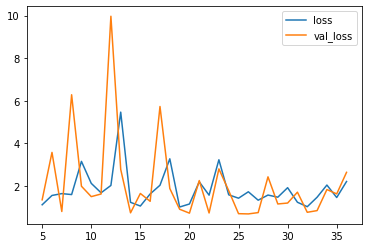

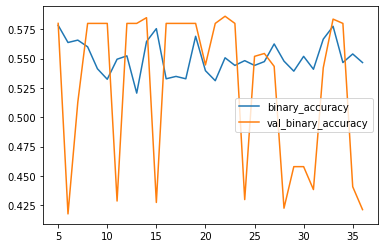

In [37]:
feature_columns_1 = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                     'Organic_carbon', 'Trihalomethanes', 'Turbidity']
X = df[feature_columns_1]
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(df.isnull().sum())

numerical_transformer = SimpleImputer(strategy='mean') # the default is mean
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, feature_columns_1)])

# preprocessing
#preprocessor = make_column_transformer((StandardScaler(), # numerical data
#                                        make_column_selector(dtype_include=np.number)),
#                                       (OneHotEncoder(sparse=False), # categorical data
#                                        make_column_selector(dtype_include=object)))

model_dnn = keras.Sequential([layers.Dense(8, activation='relu', input_shape=[9]),
                          layers.Dense(8, activation='relu'),
                          layers.Dense(8, activation='relu'),
                          layers.Dense(1, activation='sigmoid')])

model_dnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                               min_delta=0.001,
                                               restore_best_weights=True)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


history = model_dnn.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        batch_size=32,
                        epochs=1000,
                        callbacks=[early_stopping],
                        verbose=0) # hide the output because we have so many epochs

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))



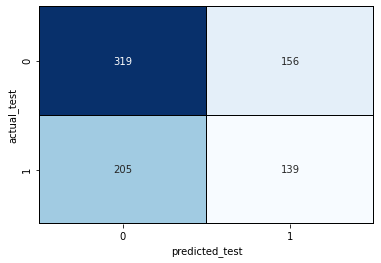

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       475
           1       0.47      0.40      0.44       344

    accuracy                           0.56       819
   macro avg       0.54      0.54      0.54       819
weighted avg       0.55      0.56      0.55       819

accuracy = 0.5592185592185592


In [32]:
preds_test = model_dnn.predict(X_test)

for i in range(len(preds_test)):
    if (preds_test[i] < 0.5):
        preds_test[i] = 0
    else:
        preds_test[i] = 1

# Test
conf_test = confusion_matrix(y_test, preds_test)
ax = plt.axes()
sns.heatmap(conf_test, cmap='Blues', annot=True, 
            cbar=False, fmt='d',
            linecolor='black',
            linewidths=0.1)
ax.set(xlabel='predicted_test', ylabel = 'actual_test')
plt.show()

print(classification_report(y_test, preds_test))
print('accuracy =',accuracy_score(y_test, preds_test))

<div id='id-section213'/>

### 13. Summary

In summary, we used 3 different models and tried different hyperparameters to obtain the best results. Moreover, we used different input features and handled missing data points to enhance the final accuracy of test dataset. By doing all of that, we have been able to increase the accuracy from **0.58** all the way to **0.78**.